In [4]:
import sys
sys.path.append('PhenoTool/')

import networkx
import obonet
import pandas as pd
import numpy as np
#import DeepPhenotyping_functions as func
import matplotlib.pyplot as plt

## Import OBO object HPO

In [5]:
%%time
url = 'phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

Wall time: 3.52 s


In [8]:
hpo_id = id_to_name['HP:0000234']
hpo_id 

'Abnormality of the head'

In [16]:


df_hpo = get_superclass(graph, hpo_id, name_to_id, id_to_name)
df_hpo.head()

• Reduced alpha/beta synthesis ratio ⟶ Imbalanced hemoglobin synthesis ⟶ Abnormal hemoglobin ⟶ Abnormal erythrocyte morphology ⟶ Abnormality of blood and blood-forming tissues ⟶ Phenotypic abnormality
• HP:0000234 ⟶ HP:0000152 ⟶ HP:0000118


,index,HPO id,Phenotype
0,0,HP:0000118,Phenotypic abnormality
1,1,HP:0000152,Abnormality of head or neck
2,2,HP:0000234,Abnormality of the head


## Read csv

In [3]:
df_actb = pd.read_csv(r'data/ACTB_data.csv', sep=',', header=0)
df_actg1 = pd.read_csv(r'data/ACTG1_data.csv', sep=',', header=0)
df_nat6 = pd.read_csv(r'data/NAT6_data.csv', sep=',', header=0)
df_nat6.head()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Recurrent infections,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency
0,NAT6,Man,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,1,0
1,NAT6,Ant,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,0,0


### merge all data

In [4]:
df_actg1['Category'] = df_actg1['Category'] + ' (ACTG1)'
df_actb['Category'] = df_actb['Category'] + ' (ACTB)'
df_actb['Origin'] = 'ACTB'
df_actg1['Origin'] = 'ACTG1'
df_nat6['Origin'] = 'NAT6'

In [5]:
cols = list(df_actg1.loc[:, ~df_actg1.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)
df_all = pd.concat([df_actg1, df_nat6], ignore_index=True)
df_all = pd.concat([df_all, df_actb], ignore_index=True)

In [6]:
df_all = df_all.rename(columns={"Retrognatia/micrognathia" : "Retrognathia/micrognathia", "Leukocytose": "Leukocytosis", "Trombocytopenie": "thrombocytopenia", "Other Psychiatric diagnosis (shizofrenia, depression, other, not autism, or ADHD/ADD)" : "Other Psychiatric diagnosis (schizophrenia, depression, other, not autism, or ADHD/ADD)", "Mid face hypoplasia": "Midface hypoplasia"})

In [7]:
df_all['Category'] = df_all['Category'].replace({'Other/Myosin binding (ACTG1)': 'Other (ACTG1)', 'Other/Fimbrin binding (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTB)': 'Other (ACTB)'})

In [8]:
df_all#['Category'].unique()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytosis,thrombocytopenia,Asthma,Strabismus,Growth hormone deficiency,Origin
0,Gain Of Function (ACTG1),LR04-298,p.Ser155Phe,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTG1
1,Gain Of Function (ACTG1),LP98-096,p.Ser155Phe,0,1,1,0,1,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTG1
2,Gain Of Function (ACTG1),11-10857,p.Ser155Phe,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTG1
3,Loss of function (ACTG1),LR11 334,Deletion 17q25.3,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0,0,0,0,1,0,ACTG1
4,Other (ACTG1),LR16?163,p.Asn12Asp,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTG1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Loss of function (ACTB),XI,7: 5370746-6781213,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTB
109,Loss of function (ACTB),XIV,7: 5151474-6296948,0,0,0,1,1,1,1,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTB
110,Loss of function (ACTB),XXa,7: 5492967-5864851,0,1,1,1,1,1,1,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTB
111,Loss of function (ACTB),XXb,7: 5492967-5864851,0,1,1,1,0,1,1,...,0.0,0.0,0.0,0,0,0,0,0,0,ACTB


## Infer HPO

In [8]:
import columns_linked_to_hpo

In [10]:
def infer_HPO(row, column_to_hpo):
    hpo_list = []
    cols = list(row.index)
    for i in cols:
        val = row[i]
        #print(val)
        if val == 1:
            col = i.lower().strip()
            if (col in column_to_hpo.keys()) == False :
                print(col, col in column_to_hpo.keys())
            if col in column_to_hpo.keys():
                if type(column_to_hpo[col]) == list:
                    hpo_list.extend(column_to_hpo[col])
                else :
                    hpo_list.append(column_to_hpo[col])
    return hpo_list

hp_patients = list(df_all.apply(lambda x: infer_HPO(x, columns_linked_to_hpo.column_to_hpo) , axis= 1))

persistent embryonic sructures False
persistent embryonic sructures False
persistent embryonic sructures False
polyarthralgia False
persistent embryonic sructures False
persistent embryonic sructures False


## write to csv to calculate patient similarity

In [11]:
with open('data/deepdata/actg_patpheno.csv', 'w') as f:
    cnt = 0
    for pat in df_all['Id']:
        f.write(str(pat) + ',' + ','.join(hp_patients[cnt]) + '\n')
        cnt +=1

# CLUSTERING 1 : HRSS clustering

## phenotype similarity scoring by semantic similarity

In [9]:
import os
from phenopy import generate_annotated_hpo_network
from phenopy.score import Scorer

# data directory
phenopy_data_directory = os.path.join(os.getenv('HOMEPATH'), '.phenopy\\data')

# files used in building the annotated HPO network
obo_file = os.path.join(phenopy_data_directory, 'hp.obo')
disease_to_phenotype_file = os.path.join(phenopy_data_directory, 'phenotype.hpoa')

# if you have a custom ages_distribution_file, you can set it here.
#ages_distribution_file = os.path.join(phenopy_data_directory, 'xa_age_stats_oct052019.tsv')

hpo_network, alt2prim, disease_records = \
    generate_annotated_hpo_network(obo_file,
                                   disease_to_phenotype_file,
                                   #ages_distribution_file=ages_distribution_file
                                   )

scorer = Scorer(hpo_network)

terms_a = ['HP:0000377']# wide nasal bridge  #hp_patients[0]
terms_b = ['HP:0000153']# abnormality #hp_patients[1]

print(scorer.score_term_sets_basic(terms_a, terms_b))

2020-09-10 11:43:02,649 - phenopy - INFO - checking if config file exists: \Users\levrex\.phenopy
2020-09-10 11:43:02,661 - phenopy - INFO - phenopy 0.4.2
2020-09-10 11:43:02,695 - phenopy - INFO - Using configuration file: \Users\levrex\.phenopy\phenopy.ini


0.0


In [87]:
l = []
for j in range(len(hp_patients)):
    for i in range(len(hp_patients)):
        l.append(scorer.score_term_sets_basic(hp_patients[i], hp_patients[j]))
#print(l)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.7449466264635605, 0.511290928943568, 0.46650365217903333, 0.020417126735008534, 0.3261877920200704, 0.5800288735034381, 0.38629092894356803, 0.6283646129620579, 0.5207601903608471, 0.4860428443367907, 0.015895329695063815, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006873940628339935, 0.0, 0.0, 0.3154046500048863, 0.2039199208586172, 0.2761273937935435, 0.21808662300034165, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13839303115144344, 0.15054023071082984, 0.6854886686858813, 0.1576791857732239, 0.4367261903868005, 0.4793352458845951, 0.511290928943568, 0.5082138603719266, 0.6283646129620578, 0.5409412400705864, 0.043554640121501585, 0.5207601903608471, 0.40844599750578475, 0.20455097962210367, 0.2454038135086822, 0.1786132331924865, nan, 0.1957660352993358, 0.011117617623484994, 0.08850694035887162, 0.04489337822671156, 0.04351888589895348, 0.21729260707862144, 0.3051709870947095, 0.04553729998569437, 0.10868333241529862, 0.04330121098834257, 0.0, 0.0865638892

In [126]:
l_cleaned = [x if str(x) != 'nan' else 0 for x in l ]

In [127]:
for i in l_cleaned:
    if str(i) == 'nan':
        print(i)
    #else 

In [128]:
l2 = []
n = len(hp_patients)
for j in range(len(hp_patients)):
    l2.append(l_cleaned[n*j:n+n*j])
df_hrss = pd.DataFrame(l2)

In [129]:
df_hrss.to_csv('data/deepdata/distance_matrix_hrss.csv')

## Read HRSS data

In [10]:
df_hrss = pd.read_csv('data/deepdata/distance_matrix_hrss.csv', index_col=0)
df_hrss.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.744947,0.511291,0.466504,0.020417,0.326188,0.580029,0.386291,0.628365,0.520760,0.486043,...,0.022589,0.071388,0.053030,0.105440,0.092692,0.035364,0.018605,0.027927,0.021298,0.023234
1,0.511291,0.638106,0.493442,0.076861,0.322993,0.587144,0.544356,0.563439,0.604896,0.619170,...,0.081803,0.059191,0.043204,0.088394,0.134187,0.076685,0.062309,0.122363,0.097920,0.104040
2,0.466504,0.493442,0.727840,0.022064,0.255252,0.505702,0.368442,0.547844,0.501636,0.468193,...,0.021196,0.069806,0.053030,0.109602,0.097482,0.031724,0.015605,0.012276,0.014236,0.015530
3,0.020417,0.076861,0.022064,0.303196,0.028209,0.017701,0.074936,0.019176,0.016625,0.074875,...,0.033455,0.061744,0.023645,0.059784,0.097985,0.040378,0.033129,0.078666,0.125674,0.137099
4,0.326188,0.322993,0.255252,0.028209,0.805445,0.342018,0.250878,0.313839,0.333496,0.322993,...,0.080899,0.218222,0.275649,0.178895,0.132292,0.093256,0.100644,0.087971,0.015784,0.016502


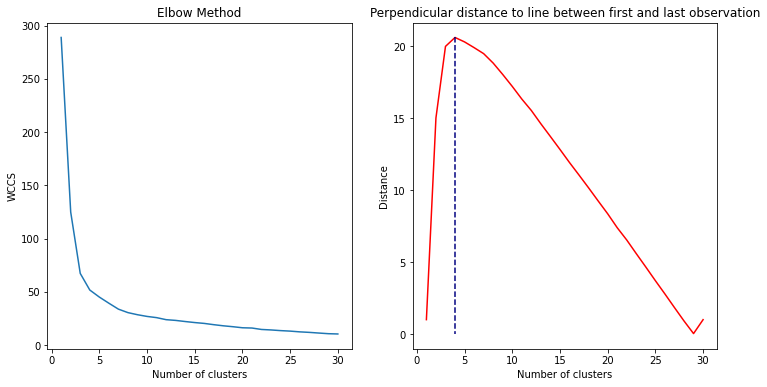

Nr of clusters = 4


In [11]:
X_trans = df_hrss[df_hrss.columns[:113]]
k = func.elbowMethod(X_trans, method='kmeans', n=30)
print('Nr of clusters = %s' % (k))

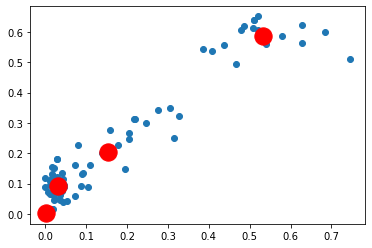

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_trans)
plt.scatter(X_trans.values[:,0], X_trans.values[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

df_hrss['cluster'] = kmeans.fit_predict(X_trans)

In [12]:
from bokeh.palettes import Colorblind8
from bokeh.palettes import Spectral10
func.makeTSNE_Cluster2(df_hrss[df_hrss.columns[:113]].values,df_all['Id'],  df_hrss['cluster'].astype(str), df_all['Category'],
                      title='All_vs', clusters=4, pal=[Colorblind8, Colorblind8], seed=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 0.692538
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.851517
[t-SNE] KL divergence after 800 iterations: 0.140663
KMeans(n_clusters=4, random_state=2)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All_vs.html


In [13]:
func.makePCA(df_hrss[df_hrss.columns[:113]].values, df_all['Id'], df_all['Category'], title='All', pal=Spectral8)

NameError: name 'Spectral8' is not defined

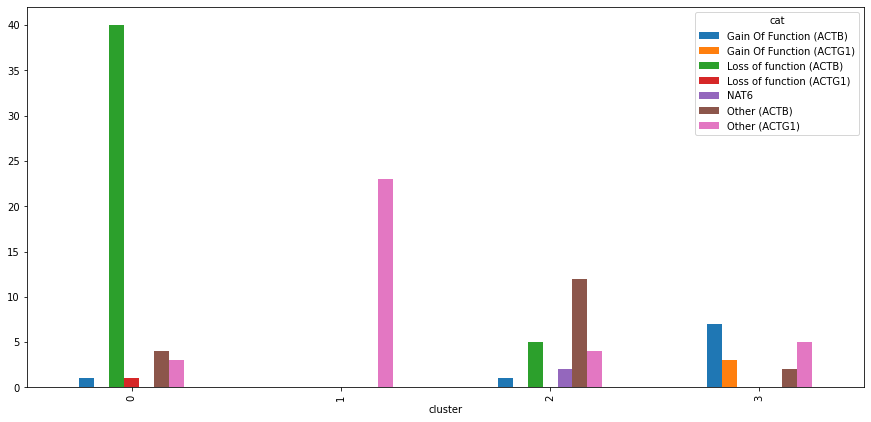

In [13]:
import matplotlib.pyplot as plt
#X = df_actg1.loc[:, cols].values # df_actg1.loc[:, cols].values # 
#X_trans = pca.fit_transform(X)


d = {'cat': df_all['Category'], 'cluster': df_hrss['cluster']}
df_bar = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(15,7))
df_bar.groupby(['cluster', 'cat']).size().unstack().plot(ax=ax, kind = 'bar') 


In [14]:
sub_df = pd.concat([df_all[['Category', 'Id', 'Origin']], df_hrss], axis=1)
#sub_df = sub_df.sort_values('cluster')
#sub_df = sub_df[list(sub_df.loc[:, ~sub_df.columns.isin(['cluster', 'Origin'])].columns)]
#func.makeDistanceHeatmap(sub_df, col_id='Id', col_label='Category', dist='HRSS', title='All')

## Explore clusters made

In [15]:
explore_df =  pd.concat([df_all, df_hrss['cluster']], axis=1)
l_ignore = ['Category', 'Id', 'Protein', 'Origin'] # , 'cluster'
columns = list(explore_df.loc[:, ~explore_df.columns.isin(l_ignore)])
#explore_df.head()

### 1. Order phenotypes by occurrence

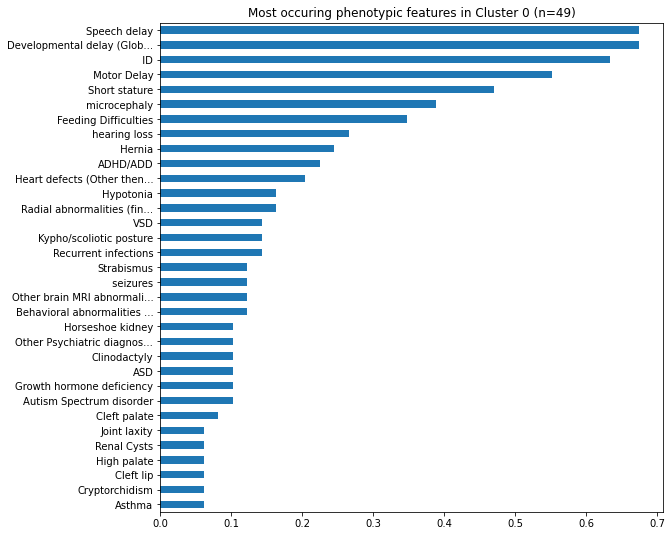

In [74]:
import importlib as imp

imp.reload(func)

func.visualizeMostOccuringFeatures(explore_df[columns], cluster=0, cutoff=0.05)

#plt.bar()

### 2. Order by information content
- maybe also consider level

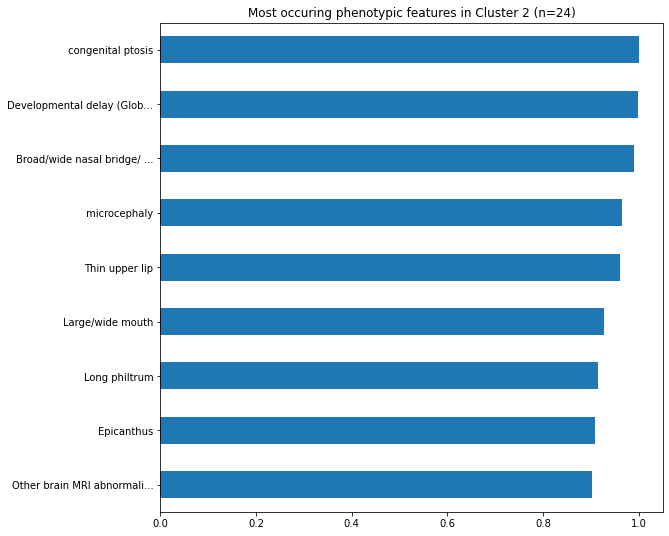

In [51]:
#from phenopy.ic import calculate_information_content
#from phenopy.d2p import load as load_d2p

#hpo_network = calculateIC(hpo_network, len(disease_records))
func.visualizeIC_Features(explore_df[columns], l_ic_weight, l_depth_weight, cluster=2, cutoff=0.9)

### 3. Order by phenotypic specificity

#### load HPO_to_Genes data

In [18]:
import pandas as pd
df_hpo = pd.read_table(r'hpo/util/annotation/phenotype_to_genes.txt', sep='\t|<tab>', engine='python') # phenotype_to_genes.txt
df_hpo.head()

,#Format: HPO-id,HPO label,entrez-gene-id,entrez-gene-symbol,Additional Info from G-D source,G-D source,disease-ID for link
0,HP:0000002,Abnormality of body height,26229,B3GAT3,-,mim2gene,OMIM:245600
1,HP:0000002,Abnormality of body height,2892,GRIA3,NaN,orphadata,ORPHA:364028
2,HP:0000002,Abnormality of body height,64374,SIL1,NaN,orphadata,ORPHA:559
3,HP:0000002,Abnormality of body height,10588,MTHFS,-,mim2gene,OMIM:618367
4,HP:0000002,Abnormality of body height,51633,OTUD6B,-,mim2gene,OMIM:617452


#### Calculate weights for phenotypic specificity

In [ ]:
import columns_linked_to_hpo
l_cols = df_all.columns

weight_list = func.calculatePhenotypicSpecificity(df_all.columns[3:-1], col2hpo=columns_linked_to_hpo.column_to_hpo, df_hpo=df_hpo)
#print(coef_list)
#if (col in column_to_hpo.keys()) == False :

Raw probabilities:
  Motor Delay            0.050093
Recurrent infections    0.079545
  ID                    0.148325
Short stature           0.201754
dtype: float64


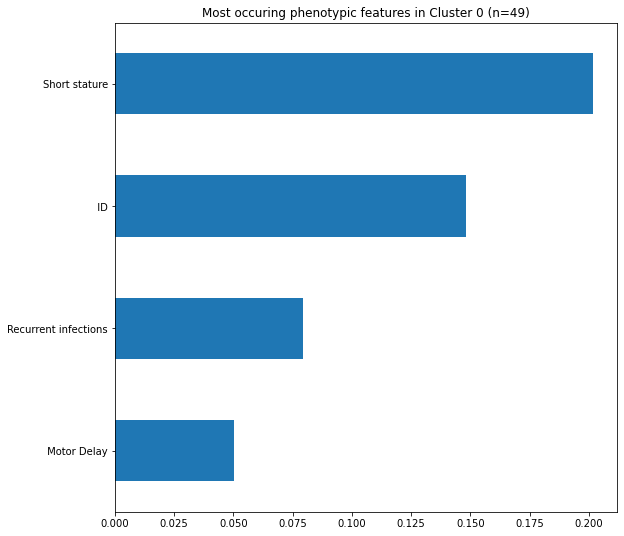

In [75]:
func.visualizePhenotypicSpecificity(explore_df[columns], weights=weight_list, cluster=0, cutoff=0.05, pat=6)

In [101]:
from bokehheat import heat

# generate test data
ls_sample = df_all['Id']
ls_variable = df_all['Id']


df_matrix = pd.DataFrame(df_hrss[df_hrss.columns[:113]].values)
df_matrix.index = ls_variable
df_matrix.columns = ls_sample
df_matrix.index.name = 'y'
df_matrix.columns.name = 'x'


In [102]:
#from bokeh.palettes import Spectral8
from bokeh.palettes import viridis
#col_list2= viridis(len(list(df_all['cluster'].unique())))

colors = ['Cyan','Green', 'Red','Yellow', 'Silver','Magenta','Orange', 'ForestGreen', 'Darkblue', 'Lime', 'Gray', 'Gold']
#color_list = [col_list2[list(df_all['cluster'].unique()).index(i)] for i in df_all['Origin']]
color_list2 = [colors[list(df_all['Category'].unique()).index(i)] for i in df_all['Category']]
color_list3 = [['Pink', 'Purple', 'Blue'][list(df_all['Origin'].unique()).index(i)] for i in df_all['Origin']]

len(df_all['Origin']), len(df_all['Category']), len(df_all['Id'])
#color_list

(113, 113, 113)

In [103]:
# generate some gene annotation
df_variable = pd.DataFrame({
    'y': ls_variable,
    'category': list(df_all['Category']),
    'origin' : list(df_all['Origin']),
    'category_color':color_list2,
    'origin_color': color_list3,
})
df_variable.index = df_variable.y

# generate some sample annotation
df_sample = pd.DataFrame({
    'x': ls_sample,
    'category': list(df_all['Category']),
    'origin' : list(df_all['Origin']),
    'category_color':color_list2,
    'origin_color': color_list3,
})
df_sample.index = df_sample.x


In [104]:
#t_yboole = (df_variable,['geneboole'],'Red','Maroon') # True, False
#t_ycat = (df_variable, ['cluster'], ['cluster_color'])
t_zcat = (df_variable, ['origin'], ['origin_color'])
#t_yquant = (df_variable, ['genereal'], [0], [k], [Colorblind8][::-1])
#t_xboole = (df_sample,['sampleboole'],'Red','Maroon') # True, False
t_xcat = (df_sample, ['category'], ['category_color'])
#t_xquant = (df_sample, ['age_year'], [0], [k], [YlGn8][::-1])
tt_boolecatquant = (t_xcat, t_zcat) # (t_ycat, t_yquant, t_xcat, t_xquant)

s_file = "clusterheatmap/heatmap_%s_All.html" % ('semanticHRSS')  # or "theclustermap.png"
o_clustermap, ls_xaxis, ls_yaxis = heat.clustermap(
    df_matrix = df_matrix,
    ls_color_palette = 'Magma256',
    r_low = 0,
    r_high = df_matrix.values.max(),
    s_z = "log2",
    tt_axis_annot = tt_boolecatquant,
    b_ydendo = True,
    b_xdendo = True,
    s_method= 'average',
    #s_metric= 'distance',
    #s_method= 'ward', #'average',
    s_metric= 'euclidean', #distance,
    b_optimal_ordering=True,
    #i_px = 64,
    #i_height = 12,
    #i_width = 12,
    #i_min_border_px = 128,
    s_filename=s_file,
    s_filetitel="the Clustermap",
)


ds_xcolor: {'Cyan': {'Gain Of Function'}, 'Green': {'Loss of function'}, 'Red': {'N-terminus'}, 'Yellow': {'Other'}, 'Silver': {'Other/Fimbrin binding'}, 'Magenta': {'Other/Myosin binding'}, 'Orange': {'NAT6'}, 'Pink': {'ACTG1'}, 'Purple': {'NAT6'}, 'Blue': {'ACTB'}}
ds_ycolor: {'Cyan': {'Gain Of Function'}, 'Green': {'Loss of function'}, 'Red': {'N-terminus'}, 'Yellow': {'Other'}, 'Silver': {'Other/Fimbrin binding'}, 'Magenta': {'Other/Myosin binding'}, 'Orange': {'NAT6'}, 'Pink': {'ACTG1'}, 'Purple': {'NAT6'}, 'Blue': {'ACTB'}}


## [Unused function] Import previous HPO translation

In [15]:
l_pat = []
hp_patients = []
with open('data/deepdata/actg_patpheno.csv', 'r') as f:
    for line in f:
        txt = line.split(',')
        txt[-1] = txt[-1].strip()
        l_pat.append(txt[0])
        hp_patients.append(txt[1:])
        #hp_patients.append()
        #f.write(str(pat) + ',' + ','.join(hp_patients[cnt]) + '\n')
        #cnt +=1

# Explore Pathophysiology

## Import HPOA

In [69]:
df_hpoa = pd.read_table(r'hpo/phenotype.hpoa', sep='\t', header=4, encoding = "ISO-8859-1")
print('Nr of HPO codes:', len(df_hpoa))
df_hpoa.head()

Nr of HPO codes: 199197


,#DatabaseID,DiseaseName,Qualifier,HPO_ID,Reference,Evidence,Onset,Frequency,Sex,Modifier,Aspect,Biocuration
0,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0000007,OMIM:210100,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
1,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0003355,OMIM:210100,IEA,NaN,NaN,NaN,NaN,P,HPO:skoehler[2009-02-17]
2,OMIM:163600,NIPPLES INVERTED,NaN,HP:0000006,OMIM:163600,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
3,OMIM:163600,NIPPLES INVERTED,NaN,HP:0003186,OMIM:163600,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
4,OMIM:615763,"#615763 CORTICAL DYSPLASIA, COMPLEX, WITH OTHE...",NaN,HP:0002365,OMIM:615763,TAS,NaN,HP:0040283,NaN,NaN,P,HPO:skoehler[2014-08-24]


In [73]:
def get_assoc_genes(hpo_id, df_hpo, df_hpoa):
    """
    Get genes that correspond to the provided phenotype (HPO)
    """
    output_genes = list(df_hpo[df_hpo['#Format: HPO-id']==hpo_id]['entrez-gene-symbol'].unique())
    l_diseases = list(df_hpo[df_hpo['#Format: HPO-id']==hpo_id]['disease-ID for link'].unique())
    output_diseases = list(df_hpoa[df_hpoa['Reference'].isin(l_diseases)]['DiseaseName'].unique())
    #output_genes = list(df_hpo[df_hpo['Reference'].isin(l_diseases)]['entrez-gene-symbol'].unique())
    return output_diseases, output_genes


col = 'hypertelorism' # 'congenital ptosis'
hpo = columns_linked_to_hpo.column_to_hpo[col]
output_diseases, output_genes = get_assoc_genes(hpo, df_hpo, df_hpoa)
print(col, output_diseases, output_genes)

hypertelorism ['HYDROPS-ECTOPIC CALCIFICATION-MOTH-EATEN SKELETAL DYSPLASIA', '#215140 HYDROPS-ECTOPIC CALCIFICATION-MOTH-EATEN SKELETAL DYSPLASIA;;HEM SKELETAL DYSPLASIA;;GREENBERG DYSPLASIA;;CHONDRODYSTROPHY, HYDROPIC AND PRENATALLY LETHAL TYPE;;MOTH-EATEN SKELETAL DYSPLASIA', '#215140 GREENBERG DYSPLASIA; GRBGD;;HYDROPS-ECTOPIC CALCIFICATION-MOTH-EATEN SKELETAL DYSPLASIA;;HEM SKELETAL DYSPLASIA;;MOTH-EATEN SKELETAL DYSPLASIA;;CHONDRODYSTROPHY, HYDROPIC AND PRENATALLY LETHAL TYPE', 'THAUVIN-ROBINET-FAIVRE SYNDROME', 'BRACHIOSKELETOGENITAL SYNDROME', 'ELSAHY-WATERS SYNDROME; ESWS', '#614195 CRANIOFACIAL ANOMALIES AND ANTERIOR SEGMENT DYSGENESIS SYNDROME; CAASDS', 'CRANIOFACIAL-DEAFNESS-HAND SYNDROME', '#122880 CRANIOFACIAL-DEAFNESS-HAND SYNDROME; CDHS', 'CRANIOFACIAL-DEAFNESS-HAND SYNDROME; CDHS', 'ROBINOW SYNDROME, AUTOSOMAL DOMINANT 3', 'ROBINOW SYNDROME, AUTOSOMAL DOMINANT 3; DRS3', '#609757 WILLIAMS-BEUREN REGION DUPLICATION SYNDROME', '#613506 AGAMMAGLOBULINEMIA 5, AUTOSOMAL DOMI

In [30]:
#weight_list
print(len(df_all.columns[3:-1]))
print(len(weight_list))

93
93


In [70]:
df_hpo.head() ['disease-ID for link']

,#Format: HPO-id,HPO label,entrez-gene-id,entrez-gene-symbol,Additional Info from G-D source,G-D source,disease-ID for link
0,HP:0000002,Abnormality of body height,26229,B3GAT3,-,mim2gene,OMIM:245600
1,HP:0000002,Abnormality of body height,2892,GRIA3,NaN,orphadata,ORPHA:364028
2,HP:0000002,Abnormality of body height,64374,SIL1,NaN,orphadata,ORPHA:559
3,HP:0000002,Abnormality of body height,10588,MTHFS,-,mim2gene,OMIM:618367
4,HP:0000002,Abnormality of body height,51633,OTUD6B,-,mim2gene,OMIM:617452


In [19]:
cnt = 0
df_occ = df_all.copy()
for column in df_all.columns[3:-1]:
    df_occ[column] = df_all[column] *coef_list[cnt] 
    cnt += 1
df_occ.head()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytosis,thrombocytopenia,Asthma,Strabismus,Growth hormone deficiency,Origin
0,Gain Of Function,LR04-298,p.Ser155Phe,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,ACTG1
1,Gain Of Function,LP98-096,p.Ser155Phe,0.0,0.142857,0.008772,0.0,0.000779,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,ACTG1
2,Gain Of Function,11-10857,p.Ser155Phe,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,ACTG1
3,Loss of function,LR11 334,Deletion 17q25.3,0.0,0.142857,0.000000,0.0,0.000000,0.004785,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015385,0.0,ACTG1
4,N-terminus,LR16?163,p.Asn12Asp,0.0,0.000000,0.000000,0.0,0.000779,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,ACTG1


In [175]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

cols = list(df_occ.loc[:, ~df_occ.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)

bool_dist = ['dice', 'hamming', 'jaccard',  'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'yule']
discrete_dist = ['braycurtis', 'canberra', 'chebyshev', 'cityblock','correlation', 'cosine','euclidean', 'jensenshannon', 'mahalanobis', 'minkowski', 'seuclidean', 'sqeuclidean',  'wminkowski', 'hamming']

distance = bool_dist[0]

df = df_occ.copy()
df = df.sample(frac=1)
pairwise = pd.DataFrame(
    squareform(pdist(df[cols], metric=distance)),
    columns = df['Id'],
    index = df['Id']
)

X_trans = pairwise.values 
#X_trans = df[cols]

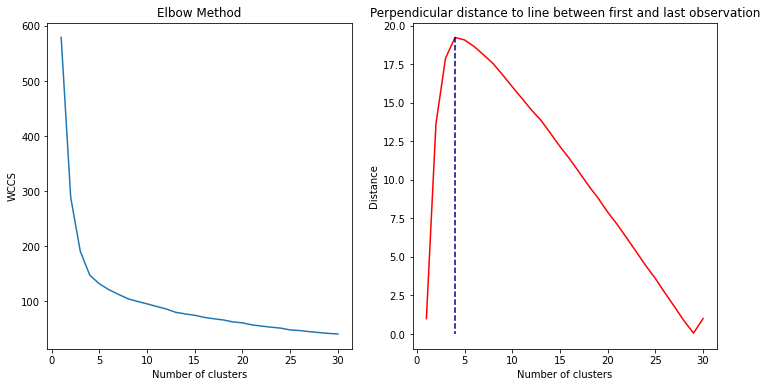

Nr of clusters = 4


In [176]:
k = func.elbowMethod(X_trans, method='kmeans', n=30)
print('Nr of clusters = %s' % (k))

In [177]:

#func.makeTSNE_Cluster(X_trans, df_occ['Id'], df_occ['Category'], title='All_GeneOccurrance_rogers', clusters=6, pal=Colorblind8)

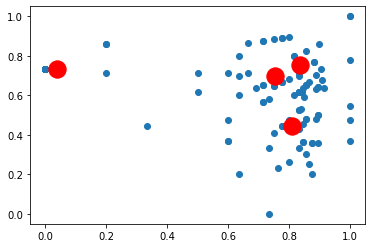

In [178]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_trans)
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

df_occ['cluster'] = kmeans.fit_predict(X_trans)

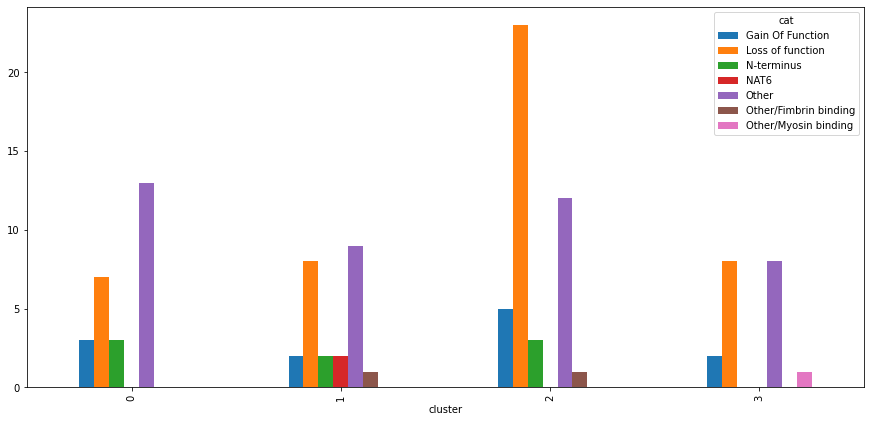

In [179]:
import matplotlib.pyplot as plt
#X = df_actg1.loc[:, cols].values # df_actg1.loc[:, cols].values # 
#X_trans = pca.fit_transform(X)


d = {'cat': df_occ['Category'], 'cluster': df_occ['cluster']}
df_bar = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(15,7))
df_bar.groupby(['cluster', 'cat']).size().unstack().plot(ax=ax, kind = 'bar') 

In [173]:
import importlib as imp

imp.reload(func)
func.makePCA2(X_trans,df_occ['Id'],  df_occ['cluster'].astype(str), df_occ['Category'],  df_occ['Origin'],
                      title='All_GeneOccurrance_rogers', clusters=k, pal=[Colorblind8, Colorblind8, Colorblind8], seed=2)

Explained PCA:	PC1= 0.9242048741274692 	PC2= 0.04813958741541355

PCA figure saved under location: PCA/phenoMap_pca_All_GeneOccurrance_rogers.html


In [161]:
func.makeTSNE_Cluster3(X_trans,df_occ['Id'],  df_occ['cluster'].astype(str), df_occ['Category'],  df_occ['Origin'],
                      title='All_GeneOccurrance_rogers', clusters=k, pal=[Colorblind8, Colorblind8, Colorblind8], seed=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 0.685076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.717361
[t-SNE] KL divergence after 1000 iterations: 0.194912
KMeans(n_clusters=5, random_state=2)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All_GeneOccurrance_rogers.html


# CLUSTER 3 - GROUPBASED

In [189]:
df_group

,HPOcode,HP:0000119,HP:0000079,HP:0010935,HP:0000077,HP:0012210,HP:0000107,HP:0100542,HP:0000085,HP:0000152,...,HP:0002012,HP:0001392,HP:0410042,HP:0025032,HP:0011458,HP:0011968,HP:0008872,HP:0040064,HP:0002817,HP:0001155
0,actbgain,0,0,0,0,0,0,0,0,"0,039154268",...,0,0,0,0,0,0,0,0,0,0
1,actbloss,"0,008458192","0,011393229","0,016385768","0,016778523","0,018541409","0,034722222","0,098425197","0,211864407","0,026429131",...,0,0,0,"0,02173913","0,026840491","0,045992116","0,09383378","0,009982886","0,00400641","0,004355401"
2,actbnterminus,0,0,0,0,0,0,0,0,"0,039154268",...,0,0,0,0,0,0,0,0,0,0
3,actbabs,0,0,0,0,0,0,0,0,"0,031323414",...,"0,019379845","0,022962113","0,027662517",0,0,0,0,"0,011409013","0,016025641","0,017421603"
4,actbother,0,0,0,0,0,0,0,0,"0,039154268",...,0,0,0,0,0,0,0,"0,005704507",0,0
5,actbtotal,"0,005126177","0,006904987","0,009930768","0,010168802","0,011237218","0,021043771","0,059651634","0,128402671","0,030848817",...,"0,00146817","0,001739554","0,002095645","0,013175231","0,016266964","0,027874009","0,056868958","0,007778873","0,003642191","0,003959455"
6,actg1gain,0,0,0,0,0,0,0,0,"0,026102845",...,0,0,0,0,0,0,0,0,0,0
7,actg1loss,0,0,0,0,0,0,0,0,"0,039154268",...,0,0,0,0,0,0,0,0,0,0
8,actg1nterminus,0,0,0,0,0,0,0,0,"0,039154268",...,0,0,0,"0,062111801","0,076687117","0,131406045","0,268096515",0,0,0
9,actg1other,0,0,0,0,0,0,0,0,"0,009212769",...,0,0,0,0,0,0,0,"0,001677796",0,0


In [193]:
df_group = pd.read_csv(r'data/deep_group/occurance_ratio_N6_and_ACTB_and_ACTG1.txt', sep='\t', header=0)
df_group = df_group.apply(lambda x: x.astype('str').str.replace(',','.'))
df_group.head()

,HPOcode,HP:0000119,HP:0000079,HP:0010935,HP:0000077,HP:0012210,HP:0000107,HP:0100542,HP:0000085,HP:0000152,...,HP:0002012,HP:0001392,HP:0410042,HP:0025032,HP:0011458,HP:0011968,HP:0008872,HP:0040064,HP:0002817,HP:0001155
0,actbgain,0,0,0,0,0,0,0,0,0.039154268,...,0,0,0,0,0,0,0,0,0,0
1,actbloss,0.008458192,0.011393229,0.016385768,0.016778523,0.018541409,0.034722222,0.098425197,0.211864407,0.026429131,...,0,0,0,0.02173913,0.026840491,0.045992116,0.09383378,0.009982886,0.00400641,0.004355401
2,actbnterminus,0,0,0,0,0,0,0,0,0.039154268,...,0,0,0,0,0,0,0,0,0,0
3,actbabs,0,0,0,0,0,0,0,0,0.031323414,...,0.019379845,0.022962113,0.027662517,0,0,0,0,0.011409013,0.016025641,0.017421603
4,actbother,0,0,0,0,0,0,0,0,0.039154268,...,0,0,0,0,0,0,0,0.005704507,0,0


In [256]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

#cols = list(df_group.loc[:, ~df_group.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)

bool_dist = ['dice', 'hamming', 'jaccard',  'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'yule']
discrete_dist = ['braycurtis', 'canberra', 'chebyshev', 'cityblock','correlation', 'cosine','euclidean', 'jensenshannon', 'mahalanobis', 'minkowski', 'seuclidean', 'sqeuclidean',  'wminkowski', 'hamming']

#distance = bool_dist[1]
distance = 'chebyshev' # discrete_dist[4]

df = df_group.copy()
df = df.sample(frac=1)
pairwise = pd.DataFrame(
    squareform(pdist(df_group[df_group.columns[1:]], metric=distance)),
    columns = df['HPOcode'],
    index = df['HPOcode']
)


X_trans = pairwise.values 
#X_trans=df_group[df_group.columns[1:]]

In [258]:
from bokeh.palettes import Paired12
import importlib as imp

imp.reload(func)

func.makePCA(X_trans, df_group['HPOcode'],  df_group['HPOcode'], title='_test_group', pal=Paired12, radius=10, seed=2)

Explained PCA:	PC1= 0.7918011319611168 	PC2= 0.15040913757798774
PCA figure saved under location: PCA/phenoMap_pca__test_group.html


In [249]:
#from bokeh.palettes import Paired12

#func.makePCA(X_trans, df_group['HPOcode'],  df_group['HPOcode'], title='_correlation_group', pal=Paired12, seed=2)

Explained PCA:	PC1= 0.38492155030314884 	PC2= 0.1681708295211341
PCA figure saved under location: PCA/phenoMap_pca__correlation_group.html
